<a href="https://colab.research.google.com/github/khangdltUIT/Deep-Learning/blob/main/efficientnet/Efficientnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Efficientnet**


## *Introduction*


Efficientnet was proposed at paper: *Efficientnet: Rethinking model scaling for convolutional Neural Network* by researchers at Google Brain. In that paper, reseachers proposed a compound scaling method which scale up not only depth dimension but also width and resoluton dimensions.

* Depth: simply means how deep the networks is which is equivalent to the number of layers in it
* Width: simply means how wide the network is 
* Resolution: is simply the image resolution that is being passed to a CNN

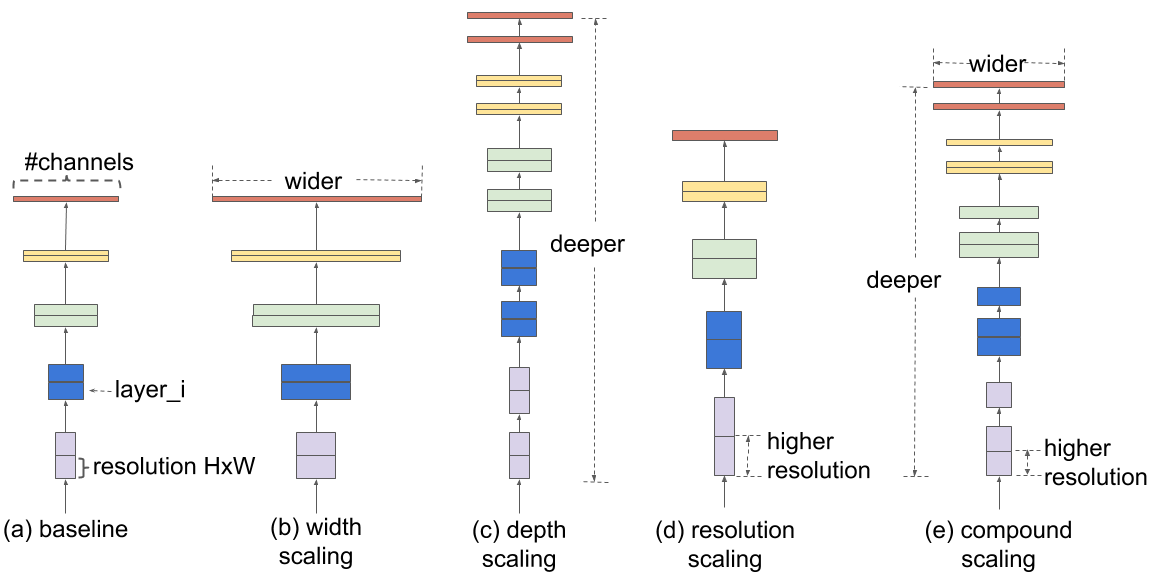

## **Implementation**

In this section, I will use Pytorch frameword for implementaion Efficientnet.  
Regarding the dataset, I use Dog/Cat Classification publshing on kaggle.com

### Step 01: Set up environment


##### Check GPU Info

In [ ]:
!nvidia-smi

Mon Nov 23 14:45:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Import Libraries used in this project

In [ ]:
#Import libraries are used in this project
from __future__ import absolute_import, division, print_function

#Authentication and download file from Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import os
from os import path

import zipfile                 #Extract zip file
import json                    #Read json 
  
import numpy as np             #linear algebra
import pandas as pd            #dataset progressing, CSV file 
import argparse                
import random
from scipy import misc
from skimage import draw

from sklearn.model_selection import train_test_split             # Used for split train & val dataset
from sklearn.metrics import roc_auc_score,accuracy_score

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.nn import Module
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import optim

import torchvision.transforms as transforms
import torchvision

from fastprogress import master_bar, progress_bar


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg                                
from PIL import Image
import cv2
import time

print('Importing... done!')

### Step 02: CORONA CHEST DATASET

* Information:  
The utility of this dataset has been confirmed by a senior radiologist in Tongji Hospital, Wuhan, China, who has performed diagnosis and treatment of a large number of COVID-19 patients during the outbreak of this disease between January and April.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored